In [1]:
import pandas as pd
full = pd.read_csv('full_data.csv').iloc[:, 1:]

## ANALYSE DATA

### Pandas profiling

In [14]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 80 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 106 non-null    object 
 1   Region                                  106 non-null    object 
 2   CPI_2012                                106 non-null    float64
 3   CPI_2013                                106 non-null    float64
 4   CPI_2014                                106 non-null    float64
 5   CPI_2015                                106 non-null    float64
 6   CPI_2016                                106 non-null    float64
 7   CPI_2017                                106 non-null    float64
 8   World Economic Forum EOS                106 non-null    float64
 9   Global Insight Country Risk Ratings     106 non-null    float64
 10  PRS International Country Risk Guide    106 non-null    float6

In [15]:
from pandas_profiling import ProfileReport

profile = ProfileReport(full, title="Pandas Profiling Report", minimal=True)

In [712]:
profile.to_notebook_iframe()

In [713]:
profile.to_file("pandas_profiling.html")

### Preprocessing: add growth rates

The formula for CAGR is defined as:

$$CAGR = \left(\frac{L}{F}\right)^\frac{1}{N}−1$$
 
Where F is the First value in your series, L is the Last value, and N is the number of years in-between.

In [2]:
# absolute evolutions
full['CPI_abs_growth'] = full['CPI_2016'] - full['CPI_2012']
full['SDI_abs_growth'] = full['SDI_2017'] - full['SDI_2012']
full['gender_abs_growth'] = full['gender_eq_2017'] - full['gender_eq_2012']
full['gini_abs_growth'] = full['gini_index_2017'] - full['gini_index_2012']
full['CO2_capita_abs_growth'] = full['CO2_capita_2017'] - full['CO2_capita_2012']
full['homicide_abs_growth'] = full['homicide_rate_2017'] - full['homicide_rate_2012']
full['top10%_abs_growth'] = full['income_share_top10%_2017'] - full['income_share_top10%_2012']
full['moderate_pov_abs_growth'] = full['moderate_poverty_%_$5.50_2017'] - full['moderate_poverty_%_$5.50_2012']
full['extreme_pov_abs_growth'] = full['extreme_poverty_%_$1.90_2017'] - full['extreme_poverty_%_$1.90_2012']
full['gdp_capita_abs_growth'] = full['gdp_per_capita_2017'] - full['gdp_per_capita_2012']

# CAGRs
full['CPI_growth'] = (full['CPI_2016']/full['CPI_2012'])**(1/5)-1
full['SDI_growth'] = (full['SDI_2017']/full['SDI_2012'])**(1/5)-1
full['gender_growth'] = (full['gender_eq_2017']/full['gender_eq_2012'])**(1/5)-1
full['gini_growth'] = (full['gini_index_2017']/full['gini_index_2012'])**(1/5)-1
full['CO2_capita_growth'] = (full['CO2_capita_2017']/full['CO2_capita_2012'])**(1/5)-1
full['homicide_growth'] = (full['homicide_rate_2017']/full['homicide_rate_2012'])**(1/5)-1
full['top10%_growth'] = (full['income_share_top10%_2017']/full['income_share_top10%_2012'])**(1/5)-1
full['moderate_pov_growth'] = (full['moderate_poverty_%_$5.50_2017']/full['moderate_poverty_%_$5.50_2012'])**(1/5)-1
full['extreme_pov_growth'] = (full['extreme_poverty_%_$1.90_2017']/full['extreme_poverty_%_$1.90_2012'])**(1/5)-1
full['gdp_capita_growth'] = (full['gdp_per_capita_2017']/full['gdp_per_capita_2012'])**(1/5)-1
full

Country              Region  CPI_2012  CPI_2013  CPI_2014  CPI_2015  \
0       Argentina            Americas      35.0      34.0      34.0      32.0   
1         Bolivia            Americas      34.0      34.0      35.0      34.0   
2          Brazil            Americas      43.0      42.0      43.0      38.0   
3          Canada            Americas      84.0      81.0      81.0      83.0   
4           Chile            Americas      72.0      71.0      73.0      70.0   
..            ...                 ...       ...       ...       ...       ...   
101  South Africa  Sub-Saharan Africa      43.0      42.0      44.0      44.0   
102      Tanzania  Sub-Saharan Africa      35.0      33.0      31.0      30.0   
103        Uganda  Sub-Saharan Africa      29.0      26.0      26.0      25.0   
104        Zambia  Sub-Saharan Africa      37.0      38.0      38.0      38.0   
105      Zimbabwe  Sub-Saharan Africa      20.0      21.0      21.0      21.0   

     CPI_2016  CPI_2017  World Economic Forum EOS  \
0        36.0      36.0                      29.0   
1        33.0      33.0                      18.0   
2        40.0      40.0                      28.0   
3        82.0      82.0                      73.0   
4        66.0      66.0                      64.0   
..        ...       ...                       ...   
101      45.0      45.0                      49.0   
102      32.0      32.0                      27.0   
103      25.0      25.0                      27.0   
104      38.0      38.0                      31.0   
105      22.0      22.0                      30.0   

     Global Insight Country Risk Ratings  ...  CPI_growth  SDI_growth  \
0                                   34.0  ...    0.005650   -0.010494   
1                                   34.0  ...   -0.005953    0.008819   
2                                   47.0  ...   -0.014360    0.002660   
3                                   83.0  ...   -0.004808   -0.026745   
4                                   59.0  ...   -0.017252   -0.008875   
..                                   ...  ...         ...         ...   
101                                 47.0  ...    0.009134    0.011377   
102                                 22.0  ...   -0.017763    0.018020   
103                                 22.0  ...   -0.029248    0.009278   
104                                 34.0  ...    0.005348    0.007088   
105                                 22.0  ...    0.019245    0.011146   

     gender_growth  gini_growth  CO2_capita_growth  homicide_growth  \
0        -0.007161    -0.000968          -0.011337        -0.038560   
1         0.000000    -0.011417           0.032529        -0.119753   
2        -0.007161    -0.000749          -0.014967         0.029792   
3        -0.007161    -0.002976          -0.008161         0.027508   
4        -0.007161    -0.006190           0.006762         0.110816   
..             ...          ...                ...              ...   
101      -0.004043     0.000000          -0.003461         0.030748   
102      -0.030360     0.000000          -0.018175        -0.057066   
103      -0.030360     0.008630           0.000800        -0.004511   
104       0.000000     0.000000           0.101972        -0.025672   
105       0.059224     0.000000          -0.047250         0.000000   

     top10%_growth  moderate_pov_growth  extreme_pov_growth  gdp_capita_growth  
0         0.000000            -0.013704           -0.061705           0.022075  
1        -0.012162            -0.025559           -0.064619           0.051269  
2        -0.002833            -0.008680            0.035262          -0.043081  
3         0.001589             0.000000           -0.167447          -0.030378  
4        -0.005953            -0.114167           -0.055912          -0.004631  
..             ...                  ...                 ...                ...  
101       0.000000             0.000000            0.000000          -0.039499  
102       0.000000    

In [3]:
import numpy as np
full['homicide_growth'] = full['homicide_growth'].apply(lambda x: 0 if not np.isfinite(x) else x)
full['moderate_pov_growth'] = full['moderate_pov_growth'].apply(lambda x: 0 if not np.isfinite(x) else x)
full['extreme_pov_growth'] = full['extreme_pov_growth'].apply(lambda x: 0 if not np.isfinite(x) else x)

In [4]:
full_reg = full[['CPI_2017', 'CPI_abs_growth', 'CPI_growth',
             'recycling_%_waste', 'plastic_%_waste', 'hazardous_waste_norm', 'e_waste_norm',
             'total_municipal_solid_waste_norm', 'national_agency_solid_waste_management',
             'national_law_solid_waste_management', 'SDI_2017','SDI_abs_growth', 
            'SDI_growth', 'CO2_capita_2017', 'CO2_capita_abs_growth', 'CO2_capita_growth',
            'World Economic Forum EOS','Global Insight Country Risk Ratings','PRS International Country Risk Guide',
            'gini_index_2017', 'gini_abs_growth', 'gini_growth', 'income_share_top10%_2017', 
            'top10%_abs_growth', 'top10%_growth', 'moderate_poverty_%_$5.50_2017', 'moderate_pov_abs_growth', 
            'moderate_pov_growth', 'extreme_poverty_%_$1.90_2017', 'extreme_pov_abs_growth', 'extreme_pov_growth', 
            'gdp_per_capita_2017', 'gdp_capita_abs_growth', 'gdp_capita_growth',
            'hdi_2017', '2013-2018_hdi_rank_change','2010-2018_hdi_annual_growth', 
            'gender_eq_2017', 'gender_abs_growth', 'gender_growth', 
            'homicide_rate_2017', 'homicide_abs_growth', 'homicide_growth']]

full_reg_old = full[['CPI_2016', 'CPI_abs_growth', 'CPI_growth',
             'recycling_%_waste', 'plastic_%_waste', 'hazardous_waste_norm', 'e_waste_norm',
             'total_municipal_solid_waste_norm', 'national_agency_solid_waste_management',
             'national_law_solid_waste_management', 'SDI_2016','SDI_abs_growth', 
            'SDI_growth', 'CO2_capita_2016', 'CO2_capita_abs_growth', 'CO2_capita_growth',
            'World Economic Forum EOS','Global Insight Country Risk Ratings','PRS International Country Risk Guide',
            'gini_index_2016', 'gini_abs_growth', 'gini_growth', 'income_share_top10%_2016', 
            'top10%_abs_growth', 'top10%_growth', 'moderate_poverty_%_$5.50_2016', 'moderate_pov_abs_growth', 
            'moderate_pov_growth', 'extreme_poverty_%_$1.90_2016', 'extreme_pov_abs_growth', 'extreme_pov_growth', 
            'gdp_per_capita_2016', 'gdp_capita_abs_growth', 'gdp_capita_growth',
            'hdi_2016', '2013-2018_hdi_rank_change','2010-2018_hdi_annual_growth', 
            'gender_eq_2016', 'gender_abs_growth', 'gender_growth', 
            'homicide_rate_2016', 'homicide_abs_growth', 'homicide_growth']]

I will remove highly correlated variables :

In [5]:
full_reg['other_eco_indices'] = (full_reg['World Economic Forum EOS'] + full_reg['Global Insight Country Risk Ratings'] + full_reg['PRS International Country Risk Guide'])/3
full_reg_old['other_eco_indices'] = (full_reg_old['World Economic Forum EOS'] + full_reg_old['Global Insight Country Risk Ratings'] + full_reg_old['PRS International Country Risk Guide'])/3

full_reg = full_reg[['CPI_2017', 'CPI_abs_growth',
            
            'recycling_%_waste', 'plastic_%_waste', 'hazardous_waste_norm', 'e_waste_norm',
            'total_municipal_solid_waste_norm', 'national_agency_solid_waste_management',
            'national_law_solid_waste_management', 'SDI_2017','SDI_abs_growth', 
            'CO2_capita_2017', 'CO2_capita_growth',
            
            'gini_index_2017', 'gini_growth', #'other_eco_indices',
            'moderate_poverty_%_$5.50_2017', 'moderate_pov_growth',
            'extreme_poverty_%_$1.90_2017','extreme_pov_growth', 
            'gdp_per_capita_2017', 'gdp_capita_growth',
            
            'hdi_2017', '2013-2018_hdi_rank_change','2010-2018_hdi_annual_growth', 
            'gender_eq_2017', 'gender_abs_growth', 'homicide_rate_2017', 'homicide_growth']]

full_reg_old = full_reg_old[['CPI_2016', 'CPI_abs_growth', 
            
            'recycling_%_waste', 'plastic_%_waste', 'hazardous_waste_norm', 'e_waste_norm',
            'total_municipal_solid_waste_norm', 'national_agency_solid_waste_management',
            'national_law_solid_waste_management', 'SDI_2016','SDI_abs_growth', 
            'CO2_capita_2016', 'CO2_capita_growth',
            
            'gini_index_2016', 'gini_growth', #'other_eco_indices',
            'moderate_poverty_%_$5.50_2016', 'moderate_pov_growth',
            'extreme_poverty_%_$1.90_2016','extreme_pov_growth', 
            'gdp_per_capita_2016', 'gdp_capita_growth',
            
            'hdi_2016', '2013-2018_hdi_rank_change','2010-2018_hdi_annual_growth', 
            'gender_eq_2016', 'gender_abs_growth', 'homicide_rate_2016', 'homicide_growth']]

<ipython-input-5-ce12d198f9e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_reg['other_eco_indices'] = (full_reg['World Economic Forum EOS'] + full_reg['Global Insight Country Risk Ratings'] + full_reg['PRS International Country Risk Guide'])/3
<ipython-input-5-ce12d198f9e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_reg_old['other_eco_indices'] = (full_reg_old['World Economic Forum EOS'] + full_reg_old['Global Insight Country Risk Ratings'] + full_reg_old['PRS International Country Risk

In [6]:
X = full_reg.drop(columns=['CPI_2017'])
y = full_reg['CPI_2017']
X_old = full_reg_old.drop(columns=['CPI_2016'])
y_old = full_reg_old['CPI_2016']

In [160]:
full_reg.to_csv('data_for_regression.csv')

### Correlation

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

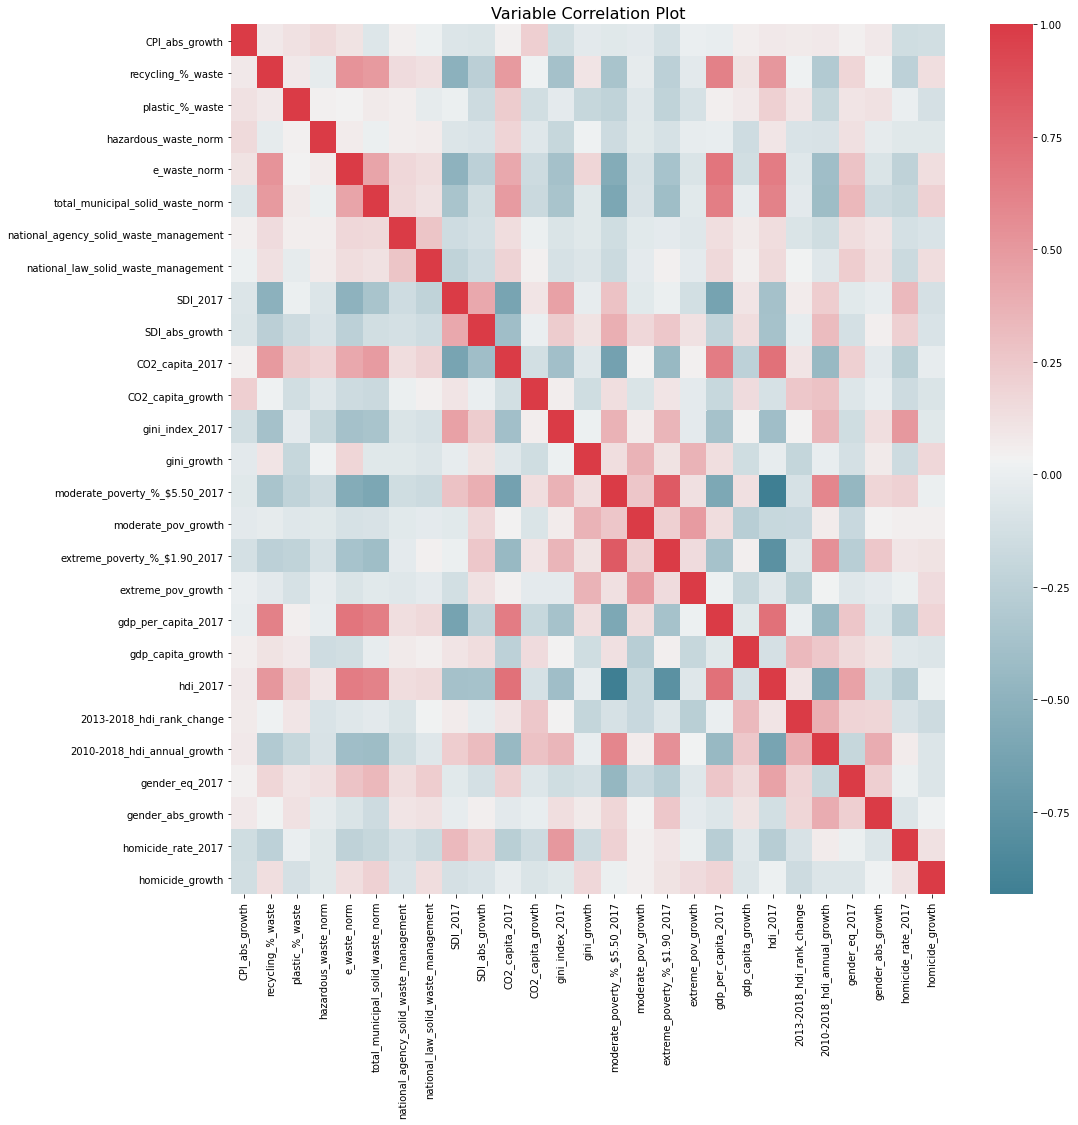

In [8]:
cor = X.corr(method='pearson')
plt.figure(figsize=(16,16))
sns.heatmap(cor, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Variable Correlation Plot", fontsize=16)
plt.show()

In [9]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
high_cor = [column for column in upper.columns if any(abs(upper[column]) > 0.75)]
print(len(high_cor))
print(high_cor)

2
['extreme_poverty_%_$1.90_2017', 'hdi_2017']


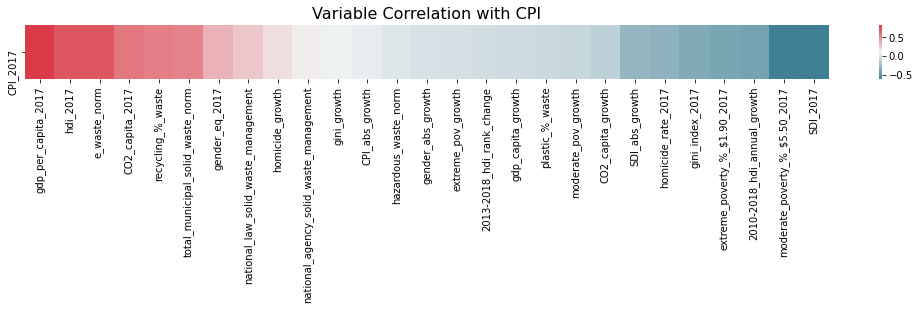

In [10]:
cor_cid = full_reg.corr(method='pearson')
cor_cid = cor_cid.iloc[:1,1:].T.sort_values('CPI_2017', ascending=False).T
#sol = cor_cid.where(np.triu(np.ones(cor_cid.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)
plt.figure(figsize=(18,1))
sns.heatmap(cor_cid, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Variable Correlation with CPI", fontsize=16)
plt.show()

In [12]:
sust = full_reg[['CPI_2017',
             'recycling_%_waste', 'plastic_%_waste', 'hazardous_waste_norm', 'e_waste_norm',
            'total_municipal_solid_waste_norm', 'national_agency_solid_waste_management',
            'national_law_solid_waste_management', 'SDI_2017','SDI_abs_growth', 
            'CO2_capita_2017', 'CO2_capita_growth',]]
eco = full_reg[['CPI_2017', #'other_eco_indices',
            'gini_index_2017', 'gini_growth',
            'moderate_poverty_%_$5.50_2017', 'moderate_pov_growth',
            'extreme_poverty_%_$1.90_2017','extreme_pov_growth', 
            'gdp_per_capita_2017', 'gdp_capita_growth']]
hum = full_reg[['CPI_2017', 'CPI_abs_growth',
            'hdi_2017', '2013-2018_hdi_rank_change','2010-2018_hdi_annual_growth', 
            'gender_eq_2017', 'gender_abs_growth', 'homicide_rate_2017', 'homicide_growth']]

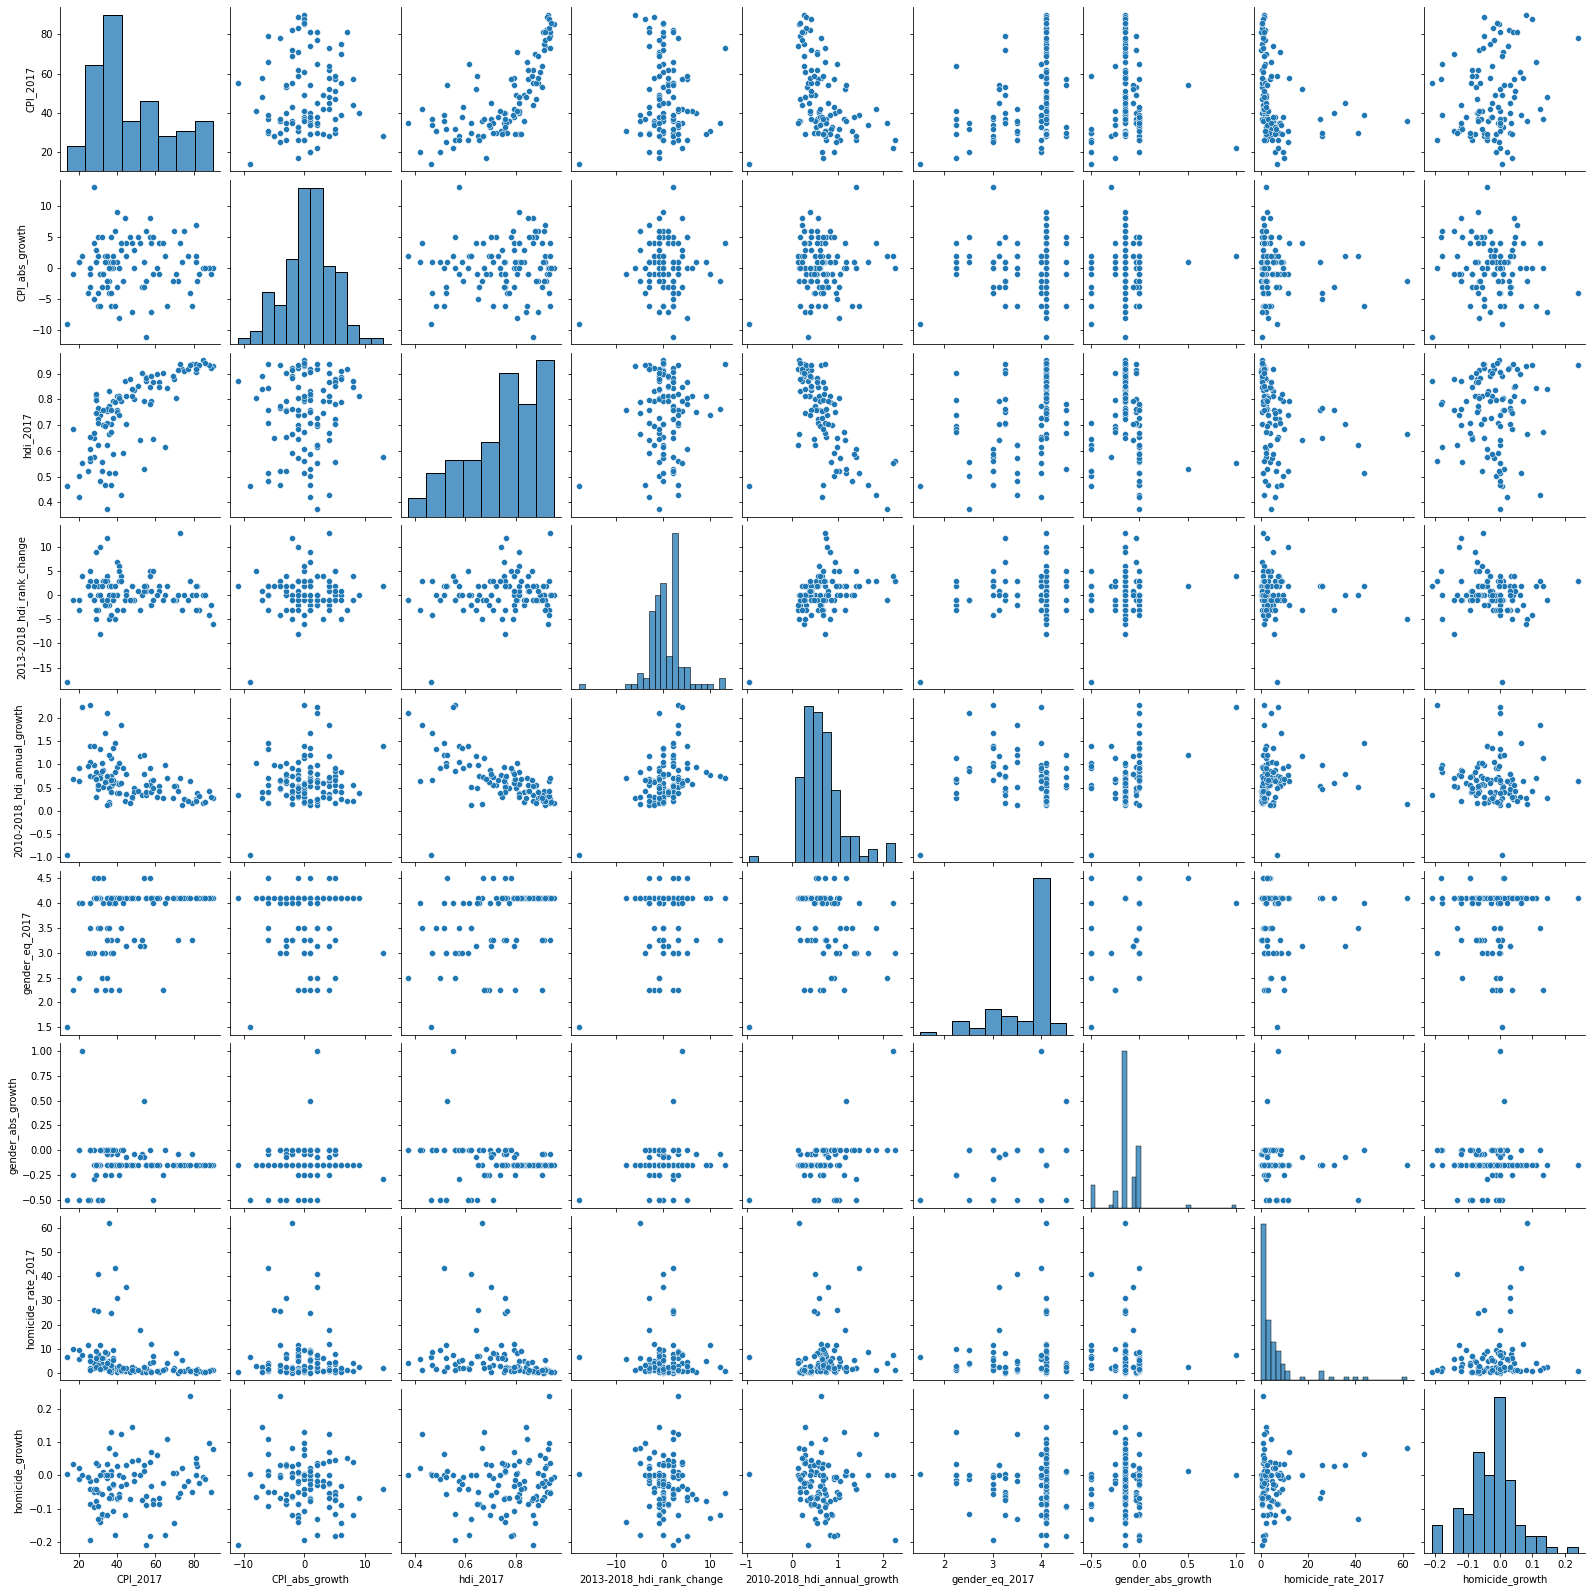

In [81]:
sns.pairplot(hum)

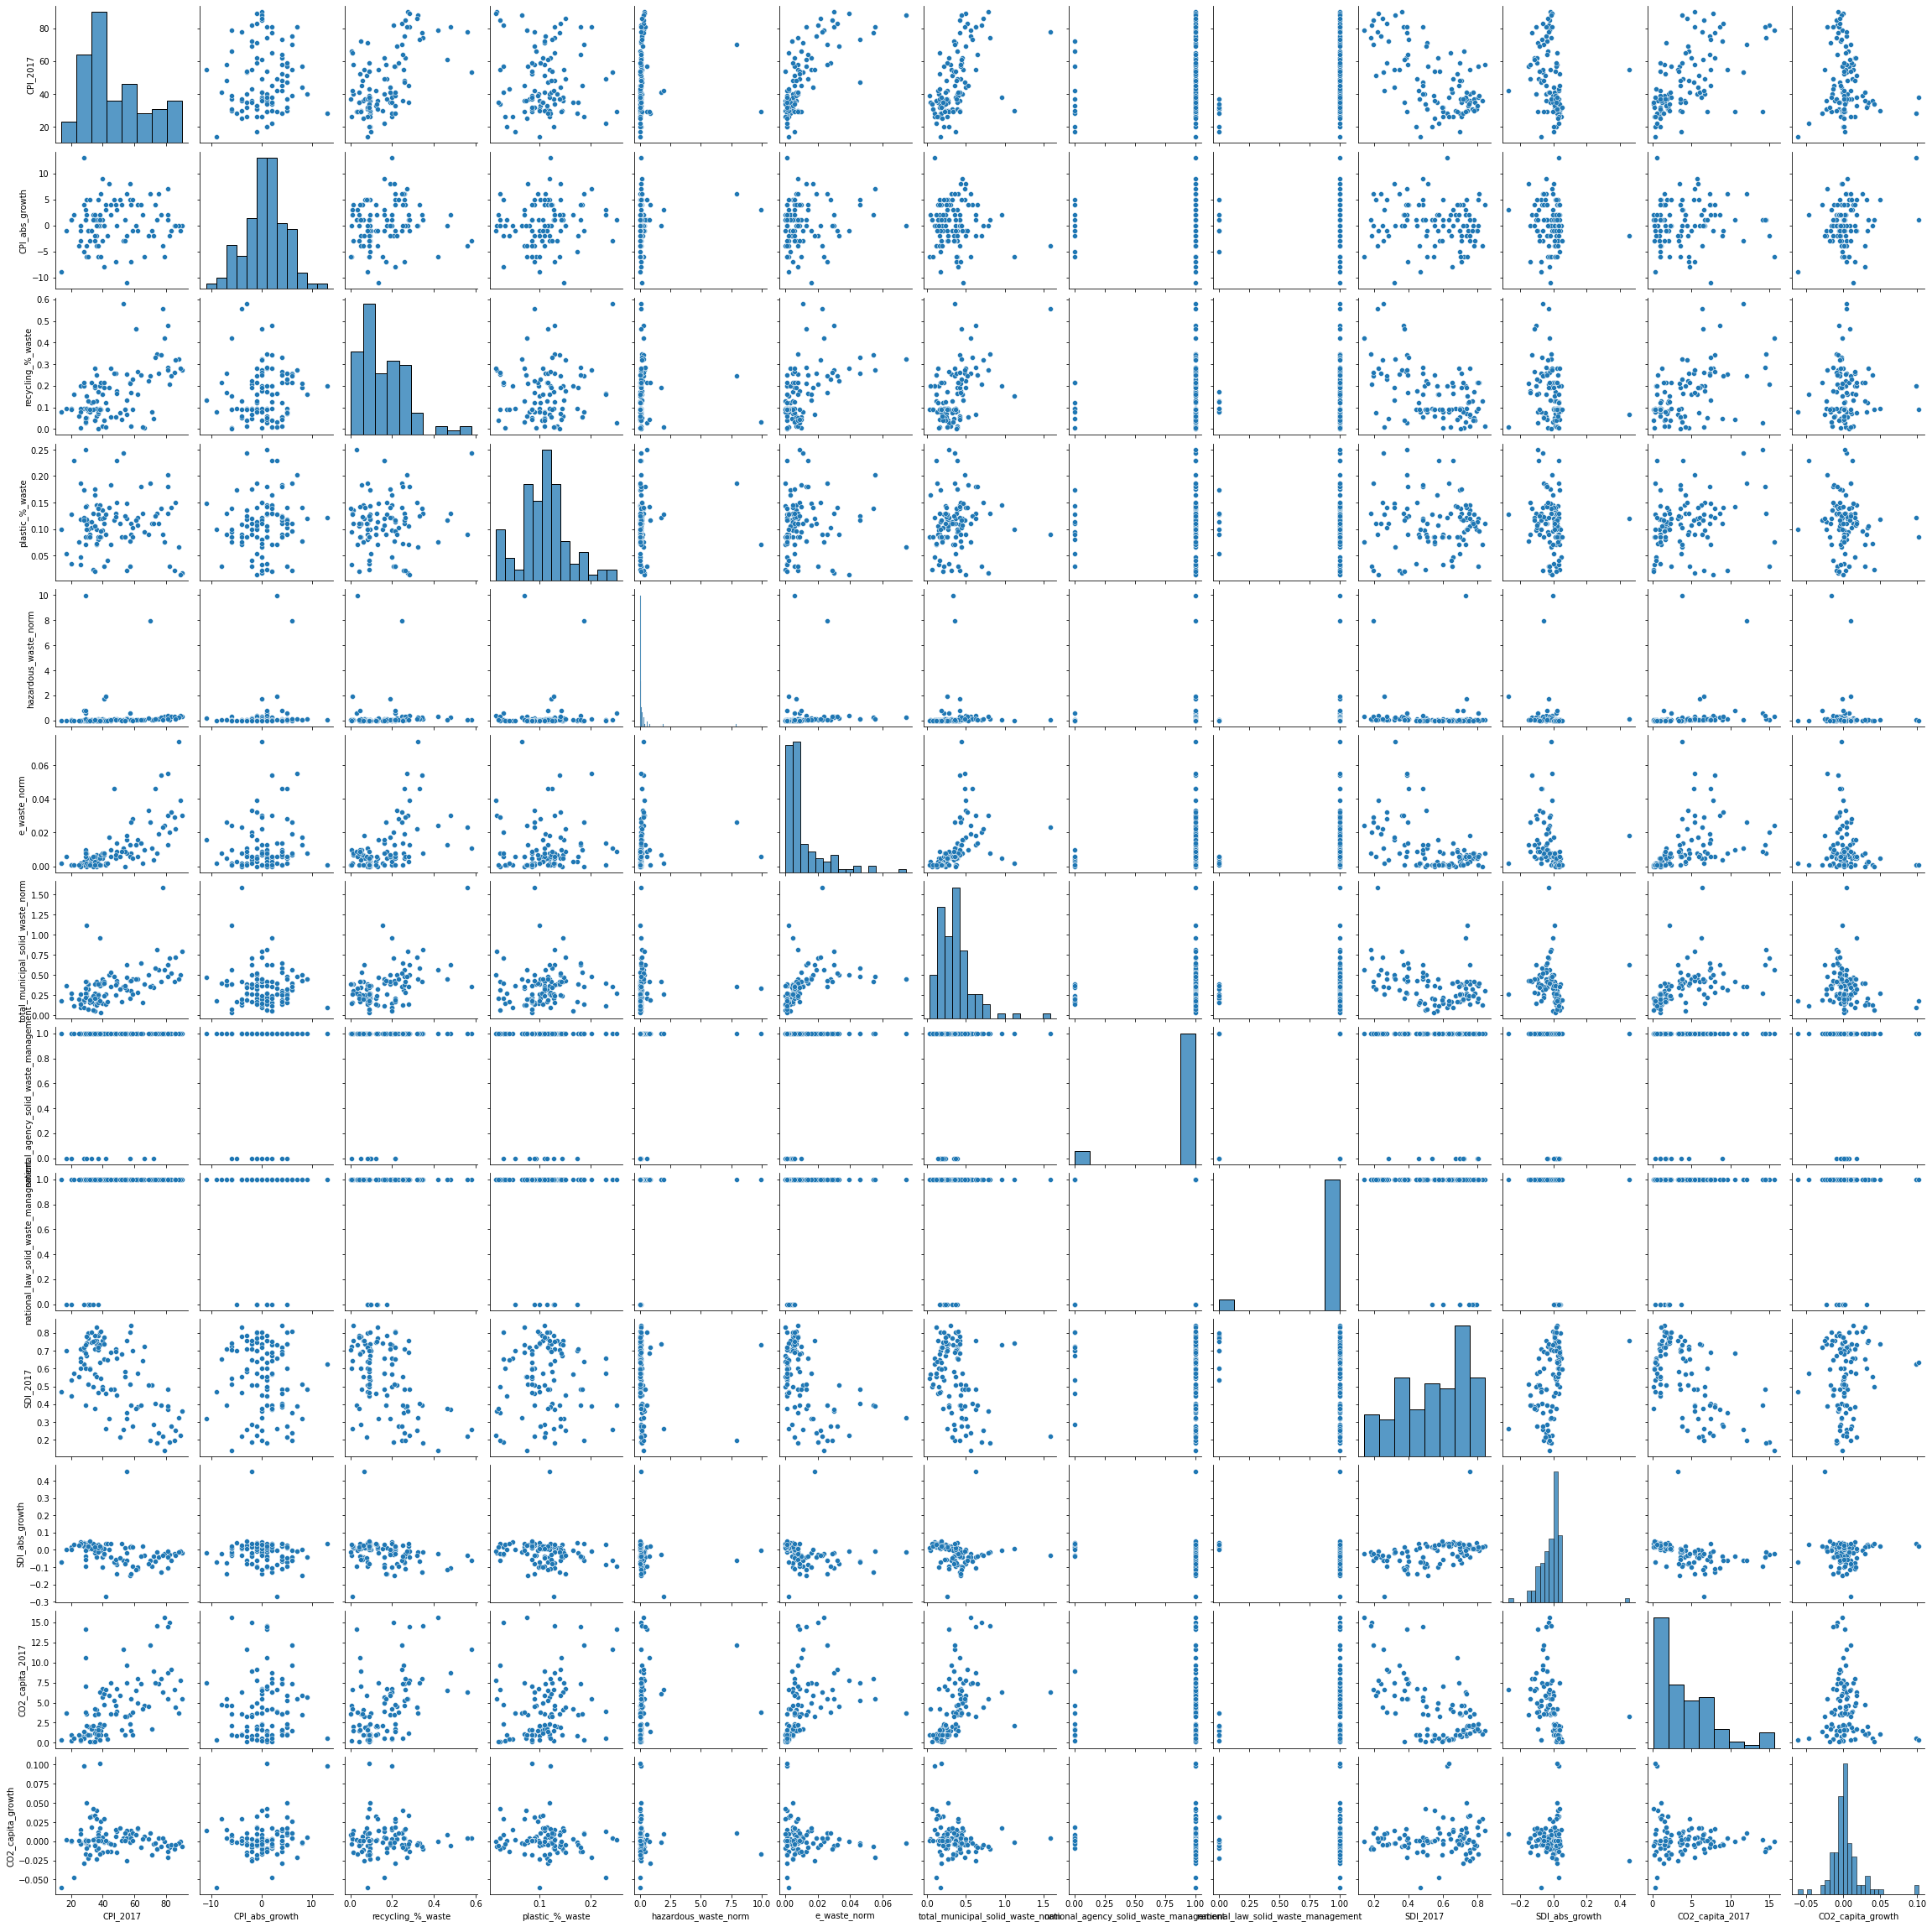

In [82]:
sns.pairplot(sust)

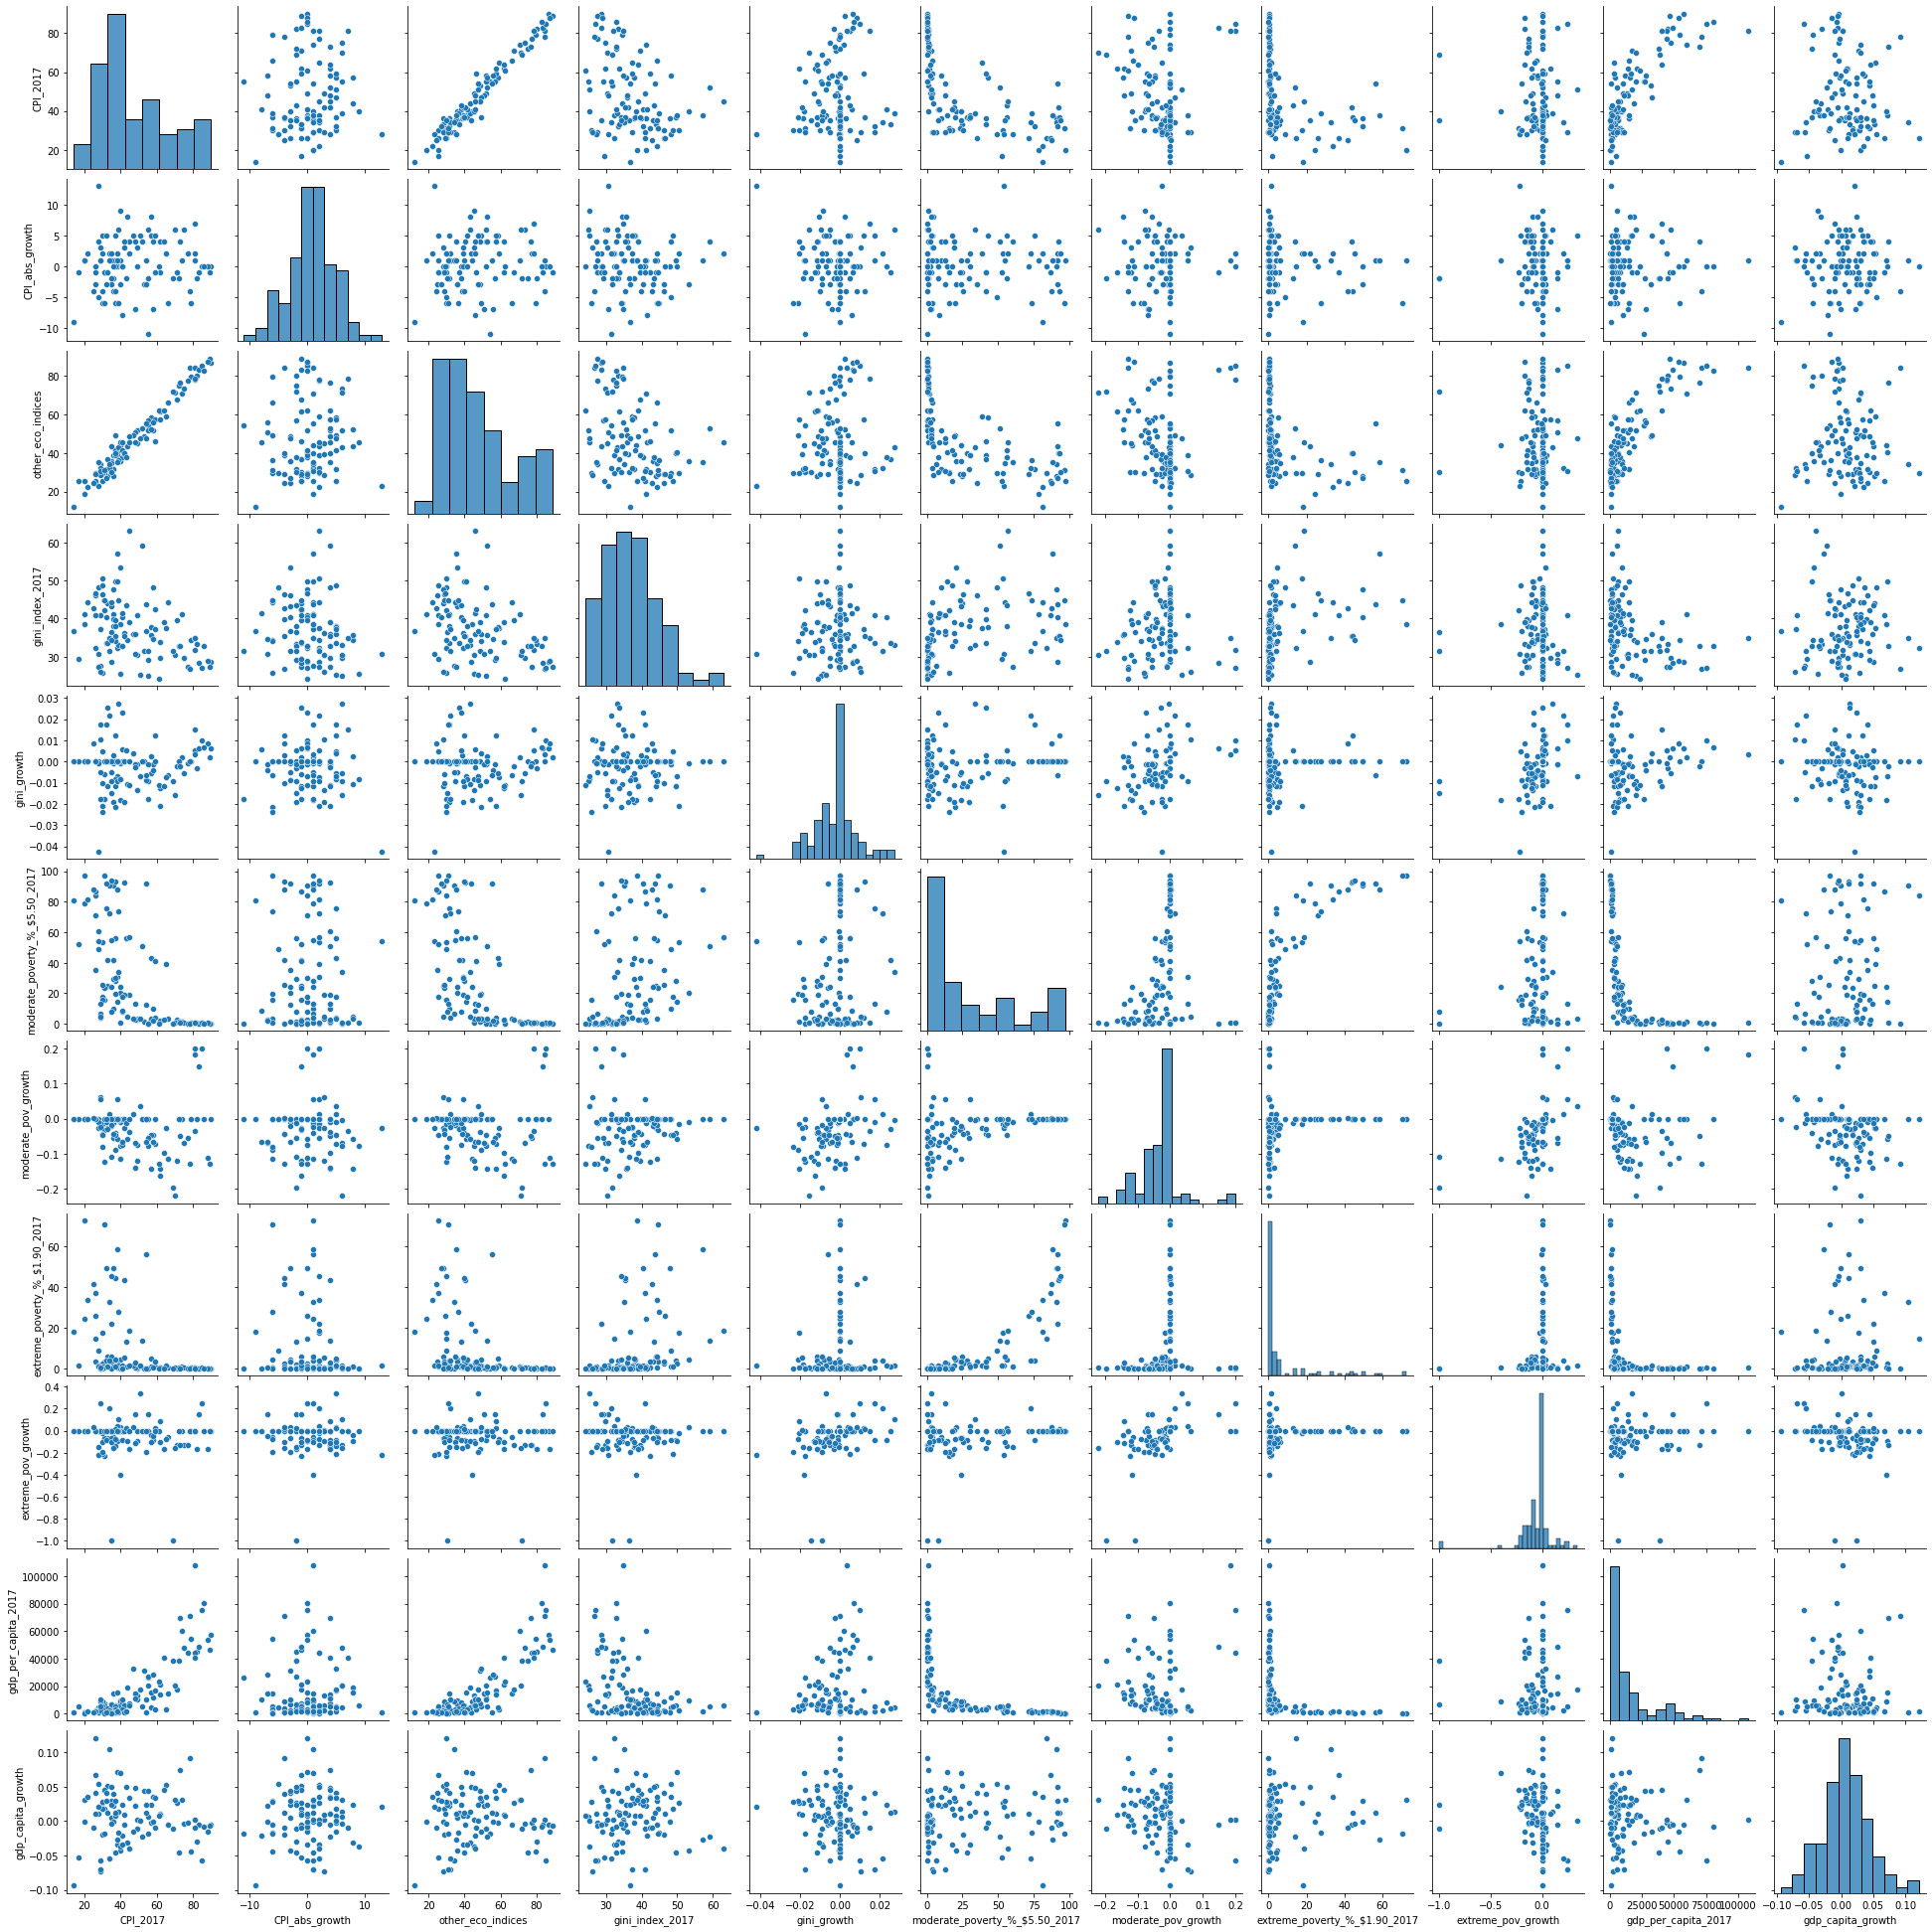

In [83]:
sns.pairplot(eco)

### OLS Regression

In [152]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

#### Train-test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Linear regression

In [146]:
LR = make_pipeline(RobustScaler(), LinearRegression()).fit(X, y)
#LR = make_pipeline(RobustScaler(), LinearRegression()).fit(X_train, y_train

In [149]:
y_pred_train = LR.predict(X)
print("train rmse: ", mean_squared_error(y, y_pred_train))
print("train R2: ", r2_score(y, y_pred_train))
#y_pred_train = EN.predict(X_train)
#print("train rmse: ", mean_squared_error(y_train, y_pred_train))
#print("train R2: ", r2_score(y_train, y_pred_train))

train rmse:  61.86159447133377
train R2:  0.8295413021162974


In [150]:
#LR.score(X_old, y_old)
#LR.score(X_test, y_test)

y_pred = LR.predict(X_old)
print("test rmse: ", mean_squared_error(y_old, y_pred))
print("test R2: ", r2_score(y_old, y_pred))
#y_pred = LR.predict(X_test)
#print("test rmse: ", mean_squared_error(y_test, y_pred)
#print("test R2: ", r2_score(y_test, y_pred))

test rmse:  61.952997249441424
test R2:  0.8292894431289509


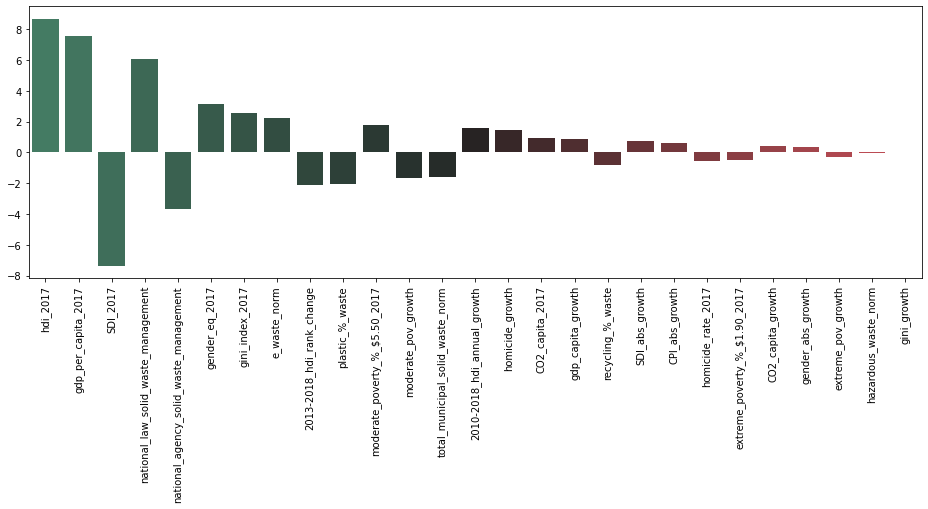

In [22]:
# plot feature importance
importance = LR[1].coef_

feature_imp = []
for i, v in enumerate(importance):
    feature_imp.append((X.columns[i], v))
feature_imp.sort(key=lambda tup: abs(tup[1]), reverse=True)

fig, ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(y= [x[1] for x in feature_imp], x = [x for x in range(len(feature_imp))], palette=sns.diverging_palette(150, 10, center="dark", n=len(feature_imp)))
#plt.bar([x for x in range(len(feature_imp))], [x[1] for x in feature_imp])
ax.set_xticks([x for x in range(len(feature_imp))])
ax.set_xticklabels([x[0] for x in feature_imp], rotation=90)
plt.show()

#### ElasticNet

In [159]:
EN = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0003, l1_ratio=.9, random_state=3, tol=0.01))
EN.fit(X, y)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0003, l1_ratio=0.9, random_state=3,
                            tol=0.01))])

In [160]:
y_pred_train = EN.predict(X)
print("train rmse: ", mean_squared_error(y, y_pred_train))
print("train R2: ", r2_score(y, y_pred_train))

train rmse:  61.86163277598708
train R2:  0.8295411965683983


In [161]:
y_pred = EN.predict(X_old)
print("test rmse: ", mean_squared_error(y_old, y_pred))
print("test R2: ", r2_score(y_old, y_pred))

test rmse:  61.95172409265879
test R2:  0.8292929512934143


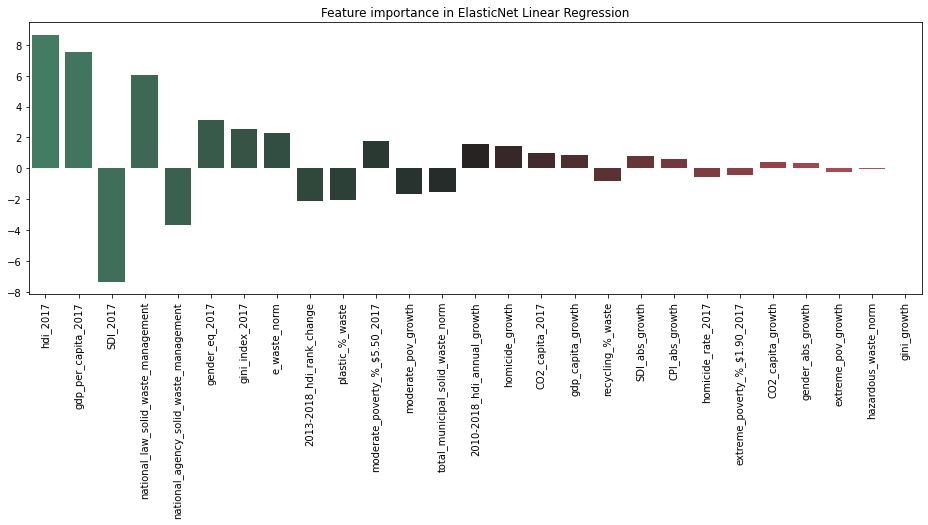

In [162]:
# plot feature importance
importance = EN[1].coef_

feature_imp = []
for i, v in enumerate(importance):
    feature_imp.append((X.columns[i], v))
feature_imp.sort(key=lambda tup: abs(tup[1]), reverse=True)

fig, ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(y= [x[1] for x in feature_imp], x = [x for x in range(len(feature_imp))], palette=sns.diverging_palette(150, 10, center="dark", n=len(feature_imp)))
#plt.bar([x for x in range(len(feature_imp))], [x[1] for x in feature_imp])
plt.xticks([x for x in range(len(feature_imp))], ax.set_xticklabels([x[0] for x in feature_imp], rotation=90))
plt.title('Feature importance in ElasticNet Linear Regression')
plt.show()

In [163]:
# Define the parameters and their range
parameters = {'alpha': np.logspace(-4, -3.5, 50)}
# Run a Grid search, using R^2 as the metric to optimise alpha
elasticnet = GridSearchCV(ElasticNet(), parameters, scoring='r2', cv=10)
# Fit to the data
elasticnet.fit(X, y)
#Get the optimised value of alpha
print('Best parameter alpha = ', elasticnet.best_params_['alpha'])
print('R2 calibration: %5.3f'  % elasticnet.score(X,y))
# Run a ridge regression with the optimised value
elasticnet1 = ElasticNet(alpha=elasticnet.best_params_['alpha'])
y_cv = cross_val_predict(elasticnet1, X, y, cv=10)
# y_cv=predicted
score_cv = r2_score(y, y_cv)
mse_cv = mean_squared_error(y, y_cv)
print('R2 CV (ElasticNet): %5.3f'  % score_cv)
print('MSE CV (ElasticNet): %5.3f' % mse_cv)

Best parameter alpha =  0.00031622776601683794
R2 calibration: 0.826
R2 CV (ElasticNet): 0.680
MSE CV (ElasticNet): 116.084


#### Random forest

In [28]:
RF = make_pipeline(RobustScaler(), RandomForestRegressor(
            n_estimators=600, max_depth=110, max_features='sqrt',
             min_samples_split=10, min_samples_leaf=1, bootstrap=True))
#RF.fit(X_train, y_train)
RF.fit(X,y)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=110, max_features='sqrt',
                                       min_samples_split=10,
                                       n_estimators=600))])

In [29]:
#y_pred_train = RF.predict(X_train)
#print("train rmse: ", mean_squared_error(y_train, y_pred_train))
y_pred_train = RF.predict(X)
print("train rmse: ", mean_squared_error(y, y_pred_train))

train rmse:  31.106179219799408


In [30]:
y_pred = RF.predict(X_old)
print("test rmse: ", mean_squared_error(y_old, y_pred))
#y_pred = RF.predict(X_test)
#print("test rmse: ", mean_squared_error(y_test, y_pred))

test rmse:  35.98534229158774


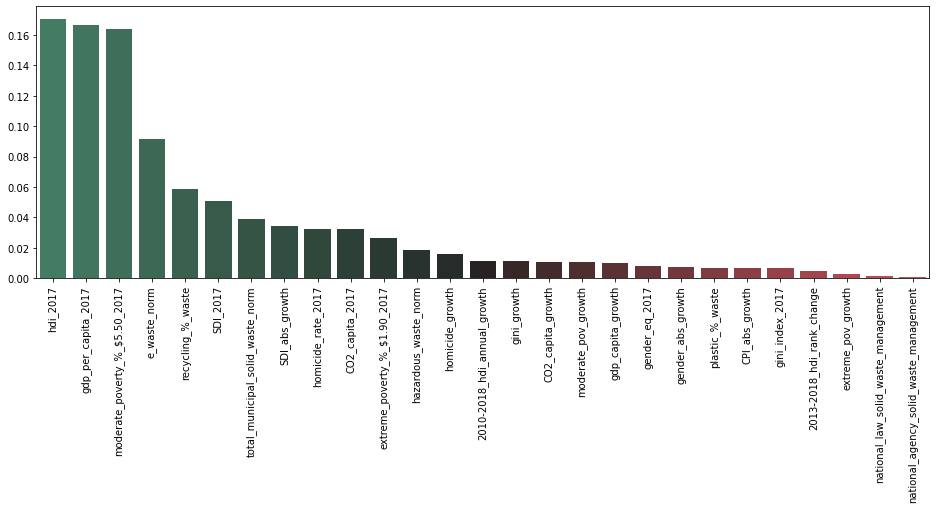

In [31]:
#plot showing how important each column is in the prediction

X_columns = X_train.columns

ordering = np.argsort(RF[1].feature_importances_)[::-1]#[:50]
importances = RF[1].feature_importances_[ordering]
feature_names = X_columns[ordering]
ticks = np.arange(len(feature_names))

fig, ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(y= importances, x = ticks, palette=sns.diverging_palette(150, 10, center="dark", n=len(feature_imp)))
plt.xticks(ticks, feature_names, rotation=90)
plt.show()

#### AdaBoost

In [32]:
AR = make_pipeline(RobustScaler(), AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
        n_estimators=100, random_state=0))
#AR.fit(X_train, y_train)
AR.fit(X, y)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('adaboostregressor',
                 AdaBoostRegressor(n_estimators=100, random_state=0))])

In [33]:
#y_pred_train = AR.predict(X_train)
#print("train rmse: ", mean_squared_error(y_train, y_pred_train))
y_pred_train = AR.predict(X)
print("train rmse: ", mean_squared_error(y, y_pred_train))

train rmse:  21.710806466488748


In [34]:
#y_pred = AR.predict(X_test)
#print("test rmse: ", mean_squared_error(y_test, y_pred))
y_pred = AR.predict(X_old)
print("test rmse: ", mean_squared_error(y_old, y_pred))

test rmse:  25.732905400392937


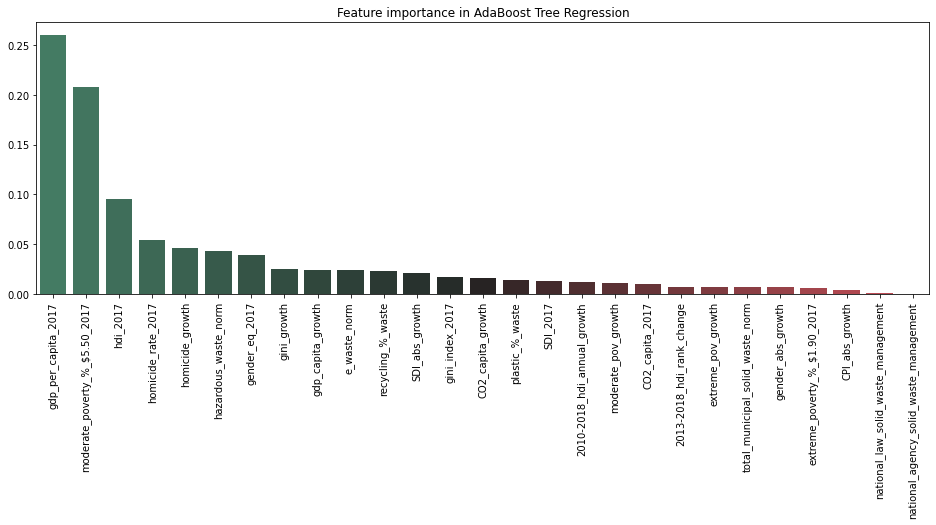

In [78]:
#plot showing how important each column is in the prediction

X_columns = X.columns

ordering = np.argsort(AR[1].feature_importances_)[::-1]#[:50]
importances = AR[1].feature_importances_[ordering]
feature_names = X_columns[ordering]
ticks = np.arange(len(feature_names))

fig, ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(y= importances, x = ticks, palette=sns.diverging_palette(150, 10, center="dark", n=len(feature_imp)))
plt.xticks(ticks, feature_names, rotation=90)
plt.title('Feature importance in AdaBoost Tree Regression')
plt.show()

### PCR (Principal Components Regression)

In [102]:
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

#### Experiment: PCA using all features

In [54]:
# PCA on all features
pca = PCA(n_components=27)
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_reduced = pca.fit_transform(X_scaled)

# check the components
pca_df = pd.DataFrame(data=pca.components_.T, columns=['PC' + str(i) for i in range(len(pca.components_))])
pca_df.head()

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0 -0.026897 -0.008915 -0.037313  0.027966 -0.298262  0.104680 -0.193356   
1 -0.205335 -0.186080  0.130041  0.034931 -0.215512 -0.294106  0.191775   
2 -0.076661  0.136250 -0.106640  0.101956 -0.289740  0.497926  0.470287   
3 -0.032609  0.004414 -0.018058  0.009173  0.013289  0.128617 -0.122927   
4 -0.210610 -0.086979  0.083682  0.037976  0.033169 -0.245861  0.014876   

        PC7       PC8       PC9  ...      PC17      PC18      PC19      PC20  \
0  0.427803  0.028259  0.135762  ...  0.263991 -0.098196 -0.157601 -0.062040   
1  0.002487  0.253944  0.208848  ...  0.098477  0.150185  0.158393 -0.131270   
2  0.096107  0.477750 -0.205446  ... -0.160175  0.124814  0.004330 -0.060139   
3  0.127739 -0.099168 -0.213987  ... -0.441010  0.074610  0.363421 -0.004685   
4  0.059709  0.050993 -0.044143  ... -0.312232  0.137819 -0.157692  0.203530   

       PC21      PC22      PC23      PC24      PC25      PC26  
0 -0.029588  0.065622  0.038944 -0.009726  0.022408 -0.022562  
1 -0.234119  0.101428  0.032413  0.113617  0.104593 -0.061327  
2  0.098346  0.013362 -0.060746  0.048000  0.060114  0.024012  
3 -0.093654  0.073045 -0.101308 -0.026351 -0.148463 -0.002445  
4 -0.165739 -0.422892  0.137482 -0.058162 -0.159808 -0.127026  

[5 rows x 27 columns]

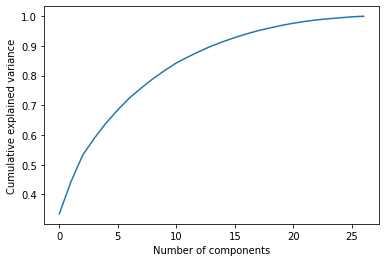

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

As our variables are low-correlated, the PCA components are quite evenly distributed in terms of explained variance (the first ones don't explain the majority of variance). However, let's see if low MSE could be reached with only some of these PCs:

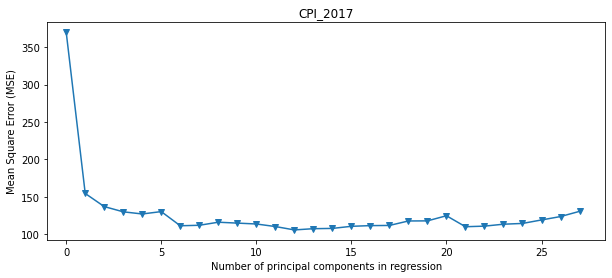

In [76]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1 * cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for all principle components, adding one component at the time
for i in np.arange(1, len(pca.components_)+1):
    score = -1 * cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results 
plt.figure(figsize=(10,4))
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Mean Square Error (MSE)')
plt.title('CPI_2017')
plt.xlim(xmin=-1);

We see that the smallest cross-validation MSE occurs (roughly) with 6 principal components! However, as shown below, the train and test errors in this configuration are higher than with the simple linear regression, not using PCs, and much higher than the tree methods such as AdaBoost.

In [68]:
# PCR model using 6 components
PCR = LinearRegression()
PCR.fit(X_reduced[:,:12], y)

y_pred_train = PCR.predict(X_reduced[:,:12])
print("train rmse: ", mean_squared_error(y, y_pred_train))

train rmse:  80.11763783801872


In [69]:
# test of the model on X_old
pca_old = PCA()
min_max_scaler = MinMaxScaler()
X_scaled_old = min_max_scaler.fit_transform(X_old)
X_reduced_old = pca_old.fit_transform(X_scaled_old)

y_pred = PCR.predict(X_reduced_old[:,:12])
print("test rmse: ", mean_squared_error(y_old, y_pred))

test rmse:  98.69334725170764


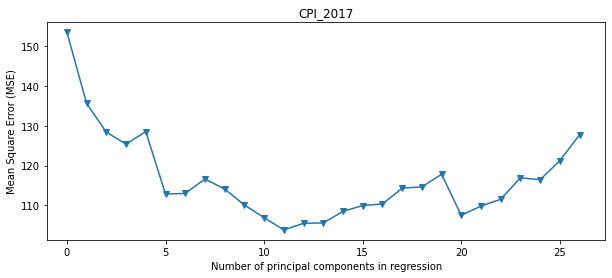

In [67]:
# Calculate MSE using CV for the 19 principle components, adding one component at the time
mse = []
for i in np.arange(1, len(pca_old.components_)+1):
    score = -1 * cross_val_score(PCR, X_reduced_old[:,:i], y_old.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results 
plt.figure(figsize=(10,4))
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Mean Square Error (MSE)')
plt.title('CPI_2017')
plt.xlim(xmin=-1);

#### Experiment 2: PCA using all features again

Based on: https://nirpyresearch.com/principal-component-regression-python-revisited/

In [92]:
def simple_regression(X,y):
    # Create linear regression object
    regr = LinearRegression()
    # Fit
    regr.fit(X, y)
    # Calibration
    y_c = regr.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(regr, X, y, cv=10)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

In [97]:
def pcr(X,y, pc):
    ''' Step 1: PCA on input data'''
    # Define the PCA object
    pca = PCA()
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    Xstd = StandardScaler().fit_transform(X)
    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(Xstd)[:,:pc]
    ''' Step 2: regression on selected principal components'''
    y_cv, score_c, score_cv, mse_c, mse_cv = simple_regression(Xreg, y)
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

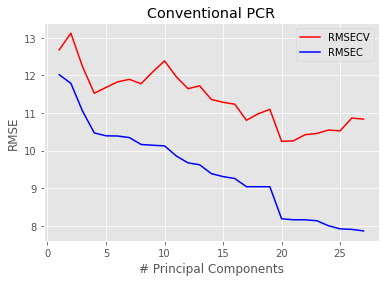

In [112]:
# maximum number of principal components
npc = 27 
pc = range(1,npc+1,1)

# Define arrays for R^2 and MSE
r2c = np.zeros(npc)
r2cv = np.zeros(npc)
msec = np.zeros(npc)
msecv = np.zeros(npc)
for i in pc:
    predicted, r2c[i-1], r2cv[i-1], msec[i-1], msecv[i-1] = pcr(X,y, pc=i)
    
with plt.style.context(('ggplot')):
    plt.plot(pc, np.sqrt(msecv[:]), 'r', label = "RMSECV")
    plt.plot(pc, np.sqrt(msec[:]), 'b', label = "RMSEC")
    plt.xlabel("# Principal Components")
    plt.ylabel("RMSE")
    plt.title("Conventional PCR")
    plt.legend()
    plt.show()

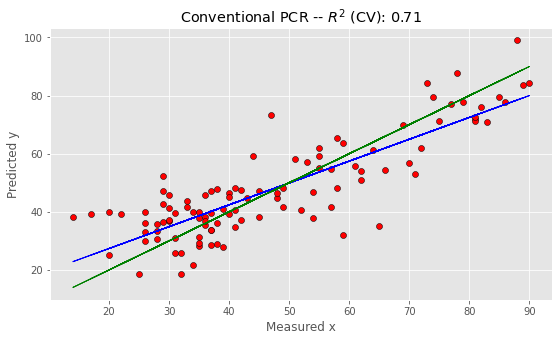

In [113]:
predicted, r2r, r2cv, mser, mscv = pcr(X,y, pc=20)
# Regression plot
z = np.polyfit(y, predicted, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y, predicted, c='red', edgecolors='k')
    ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('Conventional PCR -- $R^2$ (CV): {0:.2f}'.format(r2cv))
    plt.xlabel('Measured x')
    plt.ylabel('Predicted y')
    plt.show()

In [107]:
def pcr_revisited(X, y, pc):
    ''' Step 1: PCA on input data'''
    # Define the PCA object
    pca = PCA()
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    Xstd = StandardScaler().fit_transform(X)
    # Run PCA producing the reduced variable Xreg and select the first pc components
    Xpca = pca.fit_transform(Xstd)
    # Define a correlation array
    corr = np.zeros(Xpca.shape[1])
    # Calculate the absolute value of the correlation coefficients for each PC
    for i in range(Xpca.shape[1]):
        corr[i] = np.abs(np.corrcoef(Xpca[:,i], y)[0, 1])
    # Sort the array based on the corr values and select the last pc values 
    Xreg = (Xpca[:,np.argsort(corr)])[:,-pc:]
    ''' Step 2: regression on selected principal components'''
    y_cv, score_c, score_cv, mse_c, mse_cv = simple_regression(Xreg, y)
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

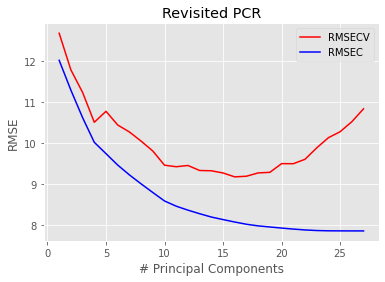

In [114]:
# maximum number of principal components
npc = 27 
pc = range(1,npc+1,1)

# Define arrays for R^2 and MSE
r2c = np.zeros(npc)
r2cv = np.zeros(npc)
msec = np.zeros(npc)
msecv = np.zeros(npc)
for i in pc:
    predicted, r2c[i-1], r2cv[i-1], msec[i-1], msecv[i-1] = pcr_revisited(X, y, pc=i)

with plt.style.context(('ggplot')):
    plt.plot(pc, np.sqrt(msecv[:]), 'r', label = "RMSECV")
    plt.plot(pc, np.sqrt(msec[:]), 'b', label = "RMSEC")
    plt.xlabel("# Principal Components")
    plt.ylabel("RMSE")
    plt.title("Revisited PCR")
    plt.legend()
    plt.show()

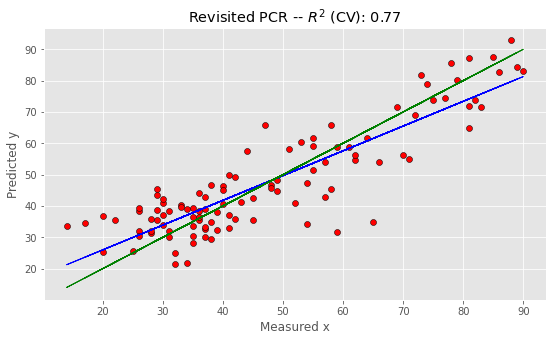

In [115]:
predicted, r2r, r2cv, mser, mscv = pcr_revisited(X,y, pc=16)
# Regression plot
z = np.polyfit(y, predicted, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y, predicted, c='red', edgecolors='k')
    ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('Revisited PCR -- $R^2$ (CV): {0:.2f}'.format(r2cv))
    plt.xlabel('Measured x')
    plt.ylabel('Predicted y')
    plt.show()

#### Final: PCA on each category

In [234]:
# check the nb of features per category
len(sust.iloc[:,1:].columns), len(eco.iloc[:,1:].columns), len(hum.iloc[:,1:].columns)

(11, 9, 8)

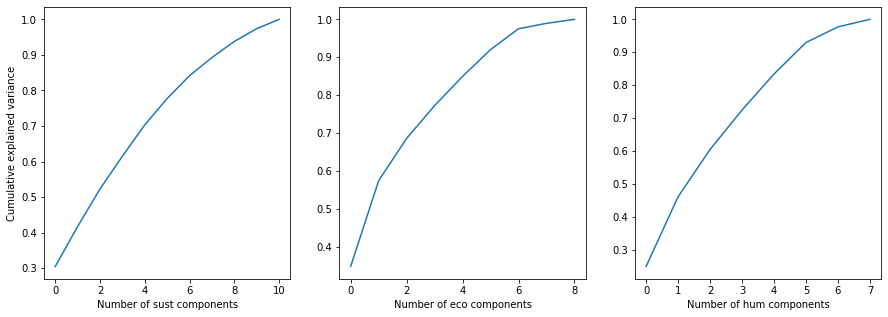

In [235]:
# PCA on each category

pca_sust = PCA()
sust_reduced = pca_sust.fit_transform(scale(sust.iloc[:,1:]))

pca_eco = PCA()
eco_reduced = pca_eco.fit_transform(scale(eco.iloc[:,1:]))

pca_hum = PCA()
hum_reduced = pca_hum.fit_transform(scale(hum.iloc[:,1:]))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(np.cumsum(pca_sust.explained_variance_ratio_))
ax1.set(xlabel='Number of sust components', ylabel="Cumulative explained variance")

ax2.plot(np.cumsum(pca_eco.explained_variance_ratio_))
ax2.set(xlabel='Number of eco components')

ax3.plot(np.cumsum(pca_hum.explained_variance_ratio_))
ax3.set(xlabel='Number of hum components');

In [241]:
# build dfs from most explanatory components

sust_df = pd.DataFrame(data=pca_sust.components_.T,
                       columns=['PC_sust' + str(i) for i in range(len(pca_sust.components_))]).iloc[:,:8]
eco_df = pd.DataFrame(data=pca_eco.components_.T,
                       columns=['PC_eco' + str(i) for i in range(len(pca_eco.components_))]).iloc[:,:6]
hum_df = pd.DataFrame(data=pca_hum.components_.T,
                       columns=['PC_hum' + str(i) for i in range(len(pca_hum.components_))]).iloc[:,:6]
len(sust_df.columns), len(eco_df.columns), len(hum_df.columns)

(8, 6, 6)

### PLS Regression

In [117]:
# Define PLS object
pls = PLSRegression(n_components=5)
# Fit
pls.fit(X, y)
# Cross-validation
y_cv = cross_val_predict(pls, X, y, cv=10)
# Calculate scores
score = r2_score(y, y_cv)
mse = mean_squared_error(y, y_cv)

In [118]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
    
    mse = []
    component = np.arange(1, n_comp)
    for i in component:
        pls = PLSRegression(n_components=i)
        
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
        mse.append(mean_squared_error(y, y_cv))
        comp = 100*(i+1)/40
        
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    
    stdout.write("\n")
    
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
    
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
    
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
    
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
    
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
    
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()
    
    return

67% completed
Suggested number of components:  5



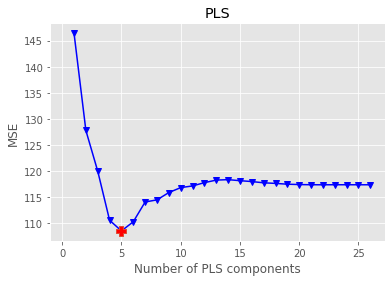

R2 calib: 0.824
R2 CV: 0.701
MSE calib: 63.815
MSE CV: 108.573


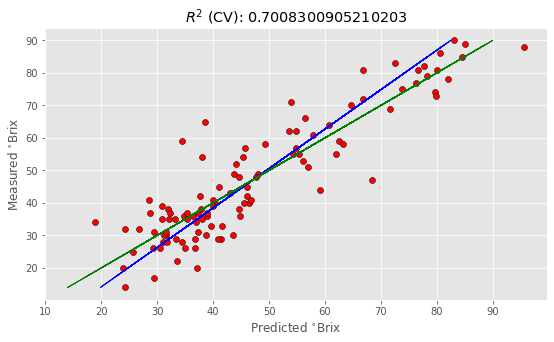

In [120]:
from sys import stdout

optimise_pls_cv(X, y, 27, plot_components=True)

In [135]:
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
    Xc = X[:,sorted_ind]
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [138]:
def simple_pls_cv(X, y, n_comp):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)    
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    # Plot regression 
    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_cv, y, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        
        plt.show()

In [137]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(np.array(X), np.array(y), 27)

100% completed
Optimised number of PLS components:  8
Wavelengths to be discarded  15
Optimised MSEP  85.0433232474162



R2 calib: 0.830
R2 CV: 0.676
MSE calib: 61.862
MSE CV: 117.403


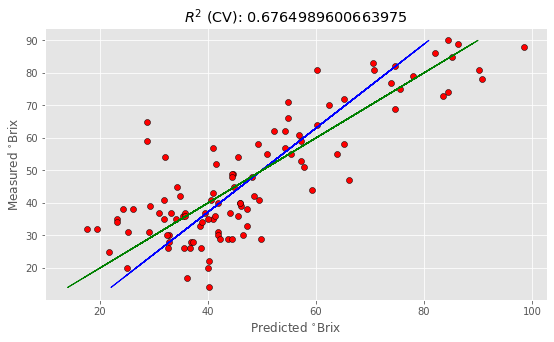

In [139]:
simple_pls_cv(np.array(X), y, 27)

In [ ]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

The lowest cross-validation error occurs when only  M=2
  partial least squares dimensions are used. We now evaluate the corresponding test set MSE:

In [ ]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

The test MSE is again comparable to the test MSE obtained using ridge regression, the lasso, and PCR.

### Other stats

#### CPI stats

In [187]:
bad = full[['Country', 'Region', 'CPI_2012', 'CPI_2017', 'CPI_abs_growth']]

In [169]:
bad[bad.CPI_abs_growth == min(bad.CPI_abs_growth)]

Country                   Region  CPI_2012  CPI_2017  CPI_abs_growth
42  Cyprus  Europe and Central Asia      66.0      55.0           -11.0

In [185]:
bad[bad.CPI_2017 < 21]

Country                        Region  CPI_2012  CPI_2017  CPI_abs_growth
11    Haiti                      Americas      19.0      20.0             1.0
81     Iraq  Middle East and North Africa      18.0      17.0            -1.0
85    Yemen  Middle East and North Africa      23.0      14.0            -9.0
88  Burundi            Sub-Saharan Africa      19.0      20.0             1.0

In [189]:
bad.groupby(['Region']).mean()['CPI_abs_growth']

Region
Americas                       -0.850000
Asia Pacific                    0.933333
Europe and Central Asia         1.250000
Middle East and North Africa   -0.428571
Sub-Saharan Africa             -0.600000
Name: CPI_abs_growth, dtype: float64

A few more statistics about Corruption Perception Index:
<br>

* The **highest-ranking** countries are Denmark (90 points in 2012, 90 in 2017) and Finland (90 in 2012, 89 in 2017), which keep respectively the 1st and 2nd rank over the period. Sweden completes the podium with a stable grade of 88 in 2012 and 2017. Switzerland and Norway, just behind, are stable at 86 and 85 respectively. The only non-European country over 80 points is Canada, at 84 in 2012 and 82 in 2017. Note that New Zealand and Singapore are also above 80, but not included in our study since we had less data for them over the other variables.
<br>

* The **lowest-ranking country** in 2012 is Myanmar (15 points), and in 2017 it's Yemen (14 points). In 2012, next to Myanmar, 3 other countries are under 20: Iraq (18), Haiti (19) and Burundi (19). Haiti and Burundi managed to climb a small step to reach 20 points, leaving 2 countries under 20 in 2017: Yemen (14 points, after a big fall - see below) and still Iraq (17, -1 point). Note that Somalia and South Sudan are also recurrently under 15 points (even under 10 for Somalia), but not included in our study since we had less data for them over the other variables.
<br>

* **France** went down from 71 to 69 points over the period, while the US went up from 73 to 74.
<br>

* The **biggest rise** from 2012 to 2017 is Myanmar, which went from 15 (last rank) to 28 points, i.e. +13 points. Other notable increases include Belarus (+9, reaching 40 points) and Latvia (+8, reaching 57 points).
<br>

* The **biggest fall** from 2012 to 2017 is Cyprus, from 66 to 55 points, i.e. -11 points. Other notable decreases include Yemen (-9, down to the last rank with 14 points) and Turkey (-8, down to 41).
<br>

* **On average**, countries in Europe & Central Asia and in the Asia-Pacific region saw their grades increase by +1 point over the period, while the other regions saw more decreases (-1 point on average for the Americas, -0.5 point on average for Sub-Saharan Africa and Middle East & North African countries).

#### More

A study published in 2012 ([link](https://link.springer.com/article/10.1023/A:1013882225402)) found a "very strong significant correlation" between the Corruption Perceptions Index and two other proxies for corruption: black market activity and an overabundance of regulation - unfortunately we weren't able to find such data for our study.

All three metrics also had a highly significant correlation with real gross domestic product per capita, which we also observed in our study (GDP per capita is one of the most relevant variables in our regression models).

In [18]:
import numpy as np
min(10,20)

10